In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import VECM
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import grangercausalitytests
import plotly
import statsmodels.api as sm
from pmdarima import model_selection
import pmdarima as pm
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
%matplotlib inline
sm.tsa.statespace.SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('GlobalTemperatures.csv')
df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [4]:
df.shape

(3192, 9)

In [5]:
df[['dt','LandAverageTemperature']].isna().sum()

dt                         0
LandAverageTemperature    12
dtype: int64

In [6]:
df[['dt','LandAverageTemperature']].isna()[36:].sum()

dt                        0
LandAverageTemperature    0
dtype: int64

In [7]:
df = df[36:]
df1 = pd.read_csv('GlobalTemperatures.csv')

In [8]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
36,1753-01-01,2.039,3.478,NaN,NaN,NaN,NaN,NaN,NaN
37,1753-02-01,0.715,6.341,NaN,NaN,NaN,NaN,NaN,NaN
38,1753-03-01,5.424,2.929,NaN,NaN,NaN,NaN,NaN,NaN
39,1753-04-01,8.272,3.177,NaN,NaN,NaN,NaN,NaN,NaN
40,1753-05-01,12.186,3.111,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
type(df.dt.iloc[0])

str

In [10]:
df['date'] = pd.to_datetime(df.dt)
df = df.set_index('date')

In [11]:
df['date'] = pd.to_datetime(df.dt)
df = df.set_index('date')

In [12]:
df_pop.tail()

,year,world,Africa,Asia,Europe,LatinAmerica,NorthAmerica,Austr/Oceania
61,2011,6996.04,1056.80,4208.42,740.87,602.82,349.38,37.18
62,2012,7076.81,1083.16,4251.85,741.43,609.53,352.28,37.72
63,2013,7158.52,1110.17,4295.73,742.00,616.30,355.21,38.26
64,2014,7241.18,1137.86,4340.06,742.56,623.16,358.15,38.80
65,2015,7324.78,1166.24,4384.84,743.12,630.09,361.13,39.36


In [13]:
df_ur.tail()

,year,urban,rural,developed,developing,communist,Jewish,Christian,Catholic,Protestant,Muslim
61,2011,3647.81,3348.23,NaN,NaN,NaN,13.658,,,,
62,2012,3722.96,3353.85,NaN,NaN,NaN,13.753,,,,
63,2013,3799.33,3359.19,NaN,NaN,NaN,13.855,,,,
64,2014,3876.97,3364.21,NaN,NaN,NaN,,"2,375.62","1,219.95",441.444,"1,660.73"
65,2015,3955.76,3369.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_pop.shape, df_ur.shape

((66, 8), (66, 11))

In [15]:
df_pop[['year','world']].isna().sum()

year     0
world    0
dtype: int64

In [16]:
df_ur[['year','urban','rural']].isna().sum()

year     0
urban    0
rural    0
dtype: int64

In [17]:
df_pop[['year','world']].dtypes

year       int64
world    float64
dtype: object

In [18]:
df_ur[['year','urban','rural']].dtypes

year       int64
urban    float64
rural    float64
dtype: object

In [19]:
df_pop['date'] = pd.to_datetime(df_pop.year, format='%Y')
df_pop = df_pop.set_index('date')
df_ur['date'] = pd.to_datetime(df_ur.year, format='%Y')
df_ur = df_ur.set_index('date')

In [20]:
df_pop1 = pd.read_csv('pop.csv', index_col=0)
df_ur1 = pd.read_csv('ur.csv', index_col=0)

In [21]:
df_com = pd.read_csv('co2-mm-mlo_csv.csv') 
df_coa = pd.read_csv('co2-annmean-mlo.csv')

In [22]:
df_com.head(5)

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [23]:
df_coa.head(5)

,Year,Mean,Uncertainty
0,1959-11-01,315.97,0.12
1,1960-11-01,316.91,0.12
2,1961-11-01,317.64,0.12
3,1962-11-01,318.45,0.12
4,1963-11-01,318.99,0.12


In [24]:
df_com[['Date','Average']].isna().sum()

Date       0
Average    0
dtype: int64

In [25]:
df_coa[['Year','Mean']].isna().sum()

Year    0
Mean    0
dtype: int64

In [26]:
type(df_com.Date[0]), type(df_coa.Year[0])

(str, str)

In [27]:
df_com['date'] = pd.to_datetime(df_com.Date)
df_com = df_com.set_index('date')

In [28]:
df_coa['date'] = pd.to_datetime(df_coa.Year)
df_coa = df_coa.set_index('date')

In [29]:
df_com[df_com.Average < 313]

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
date,,,,,,
1958-06-01,1958-06-01,1958.458,-99.99,317.10,314.85,-1
1958-10-01,1958-10-01,1958.792,-99.99,312.66,315.61,-1
1964-02-01,1964-02-01,1964.125,-99.99,320.07,319.61,-1
1964-03-01,1964-03-01,1964.208,-99.99,320.73,319.55,-1
1964-04-01,1964-04-01,1964.292,-99.99,321.77,319.48,-1
1975-12-01,1975-12-01,1975.958,-99.99,330.59,331.60,0
1984-04-01,1984-04-01,1984.292,-99.99,346.84,344.27,2


In [30]:
df_coa[df_coa.Mean < 315]

,Year,Mean,Uncertainty
date,,,


In [31]:
ave1 = np.mean([df_com.loc['1963-11-01']['Average'],df_com.loc['1963-12-01']['Average'],
                df_com.loc['1964-01-01']['Average'],df_com.loc['1964-05-01']['Average'],
                df_com.loc['1964-06-01']['Average'],df_com.loc['1964-07-01']['Average']])
df_com.loc['1964-02-01','Average'] = ave1
df_com.loc['1964-03-01','Average'] = ave1
df_com.loc['1964-04-01','Average'] = ave1

ave1 = np.mean([df_com.loc['1975-09-01']['Average'],df_com.loc['1975-10-01']['Average'],
                df_com.loc['1975-11-01']['Average'],df_com.loc['1976-01-01']['Average'],
                df_com.loc['1976-02-01']['Average'],df_com.loc['1976-03-01']['Average']])
df_com.loc['1975-12-01','Average'] = ave1

ave1 = np.mean([df_com.loc['1984-01-01']['Average'],df_com.loc['1984-02-01']['Average'],
                df_com.loc['1984-03-01']['Average'],df_com.loc['1984-05-01']['Average'],
                df_com.loc['1984-06-01']['Average'],df_com.loc['1984-07-01']['Average']])
df_com.loc['1984-04-01','Average'] = ave1

df_com = df_com[10:]

In [32]:
df_com1 = pd.read_csv('co2-mm-mlo_csv.csv')
df_coa1 = pd.read_csv('co2-annmean-mlo.csv')

In [33]:
df_coh = pd.read_csv('co2history.csv')
df_coh1 = pd.read_csv('co2history.csv')

In [34]:
df_coh.tail(5)

,year,data_mean_global,data_mean_nh,data_mean_sh
2011,2011,390.944015,393.041154,388.846876
2012,2012,393.015993,395.036206,390.995779
2013,2013,395.724979,397.714917,393.735042
2014,2014,397.546977,399.590917,395.503037
2015,2015,399.851668,401.739892,397.723974


In [35]:
df_coh[['year','data_mean_global']].isna().sum()

year                0
data_mean_global    0
dtype: int64

In [36]:
is_numeric_dtype(df_coh['year']), is_numeric_dtype(df_coh['data_mean_global'])

(True, True)

In [37]:

dfy = pd.DataFrame(df.groupby(df.index.year).LandAverageTemperature.mean())

Text(0.5, 1.0, 'Surface Temperature trend')

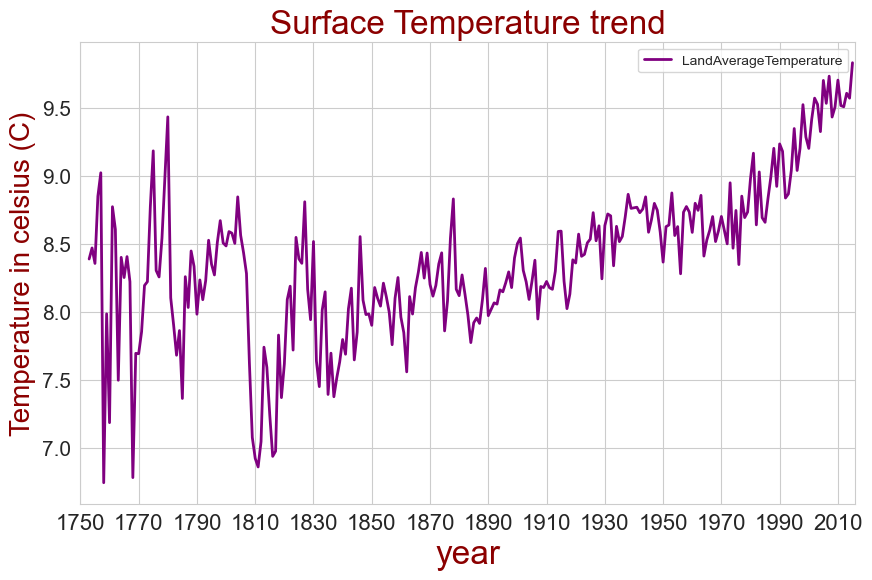

In [38]:
sns.set_style('whitegrid')
dfy.plot(figsize=(10,6), linewidth=2, color='purple')
plt.xlim([1850,2016])
plt.xlabel('year',fontsize=24, color='darkred')
plt.ylabel('Temperature in celsius (C)', fontsize=20, color='darkred')
plt.xticks(np.arange(1750,2015,20),fontsize=16)
plt.yticks(fontsize=15)
plt.title('Surface Temperature trend', fontsize=24, color='darkred')

In [39]:
dfy[:100].mean()

LandAverageTemperature    8.05065
dtype: float64

In [153]:
len(dfy)

263

In [154]:
dfy[:248].mean()

LandAverageTemperature    8.307645
dtype: float64

In [40]:
len(df_coh['data_mean_global'][1753:]), len(np.arange(1753,2015))

(263, 262)

In [41]:
df_coh['data_mean_global'][1753:][:100].mean()

280.84100994

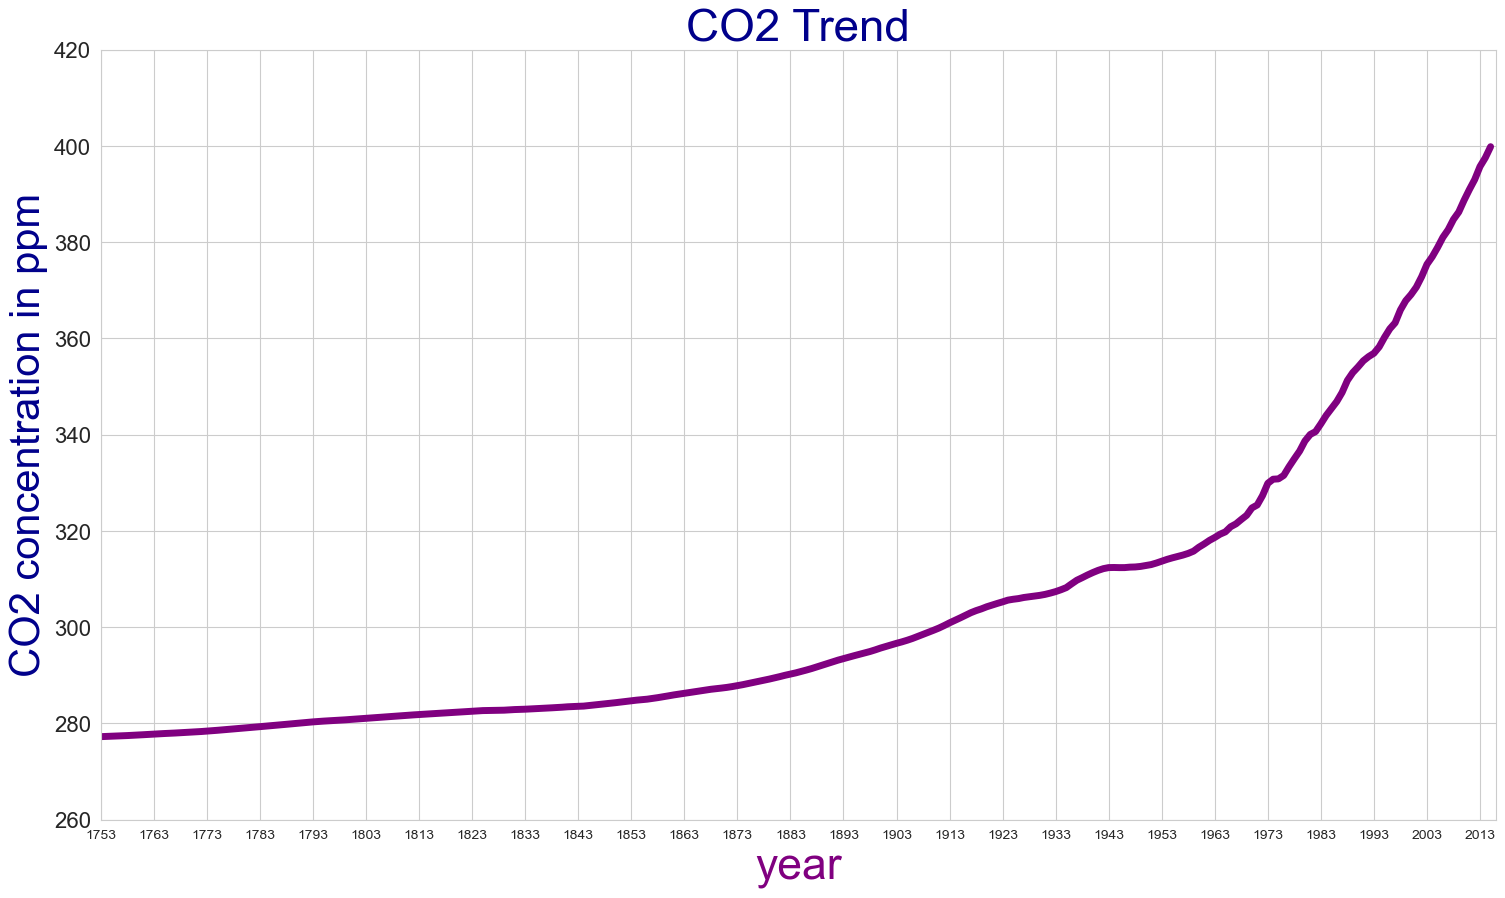

In [42]:
plt.figure(figsize=(18,10))
df_coh['data_mean_global'][1753:].plot(linewidth=5, color='purple')
plt.xlim([1753,2016])
plt.ylim([260,420])
plt.xticks(np.arange(1753,2016,10),fontsize=10);
plt.xlabel('year',fontsize=32, color='purple')
plt.ylabel('CO2 concentration in ppm', fontsize=30, color='darkblue')
plt.title('CO2 Trend', fontsize=33, color='darkblue')
plt.yticks(fontsize=16);

In [43]:
df_co1753 = df_coh['data_mean_global'][1753:]

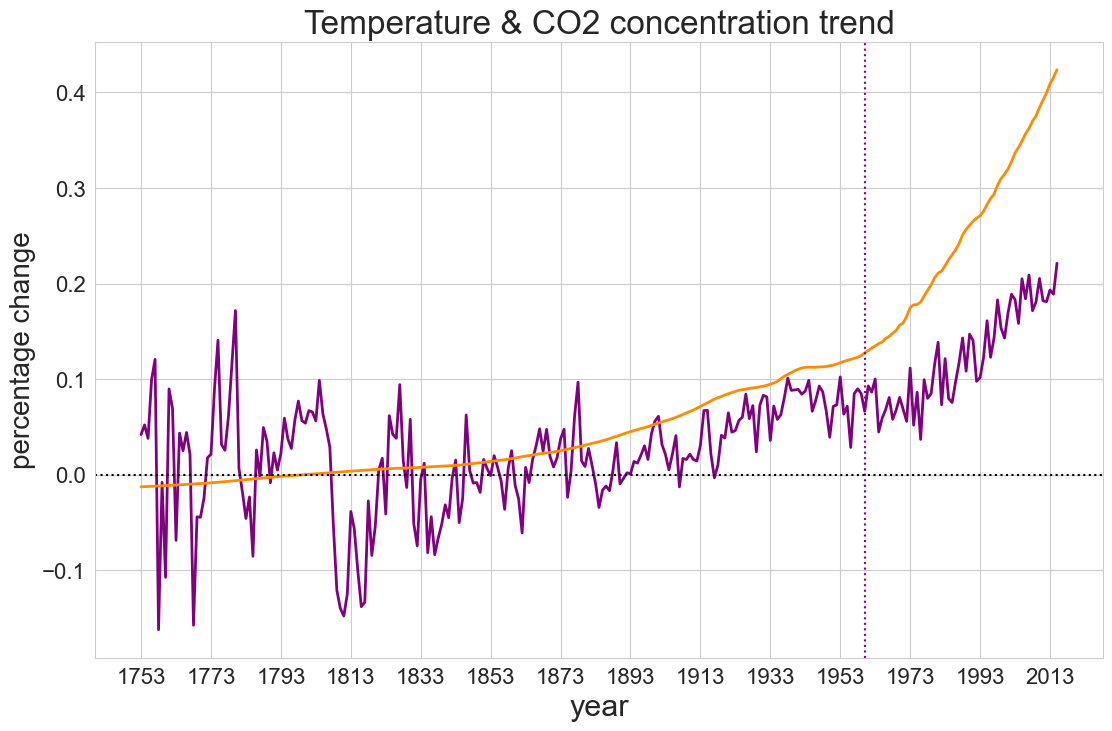

In [44]:
plt.figure(figsize=(13,8));
plt.plot((dfy - dfy[:100].mean())/(dfy[:100].mean()), linewidth=2, color='purple');
plt.plot((df_co1753 - df_co1753[:100].mean())/(df_co1753[:100].mean()), linewidth=2, color='darkorange');
plt.xticks(np.arange(1753,2015,20),fontsize=16);
plt.xlabel('year',fontsize=22)
plt.ylabel('percentage change', fontsize=20)
plt.yticks(fontsize=13)
plt.title('Temperature & CO2 concentration trend', fontsize=24)
plt.yticks(fontsize=16);
plt.axvline(1960, lw=1.5, c='darkmagenta', label='speedup', linestyle=':')
plt.axhline(lw=1.5, c='k', label='baseline', linestyle=':')


In [45]:
df_ur.head()

,year,urban,rural,developed,developing,communist,Jewish,Christian,Catholic,Protestant,Muslim
date,,,,,,,,,,,
1950-01-01,1950,743.60,1782.18,812.94,1712.84,854.19,11.297,,,,
1951-01-01,1951,767.15,1805.71,822.49,1750.36,873.14,,,,,
1952-01-01,1952,791.00,1828.29,832.46,1786.83,889.87,,,,,
1953-01-01,1953,815.80,1850.07,842.68,1823.18,905.14,,,,,
1954-01-01,1954,841.62,1871.55,853.03,1860.15,919.80,,,,,


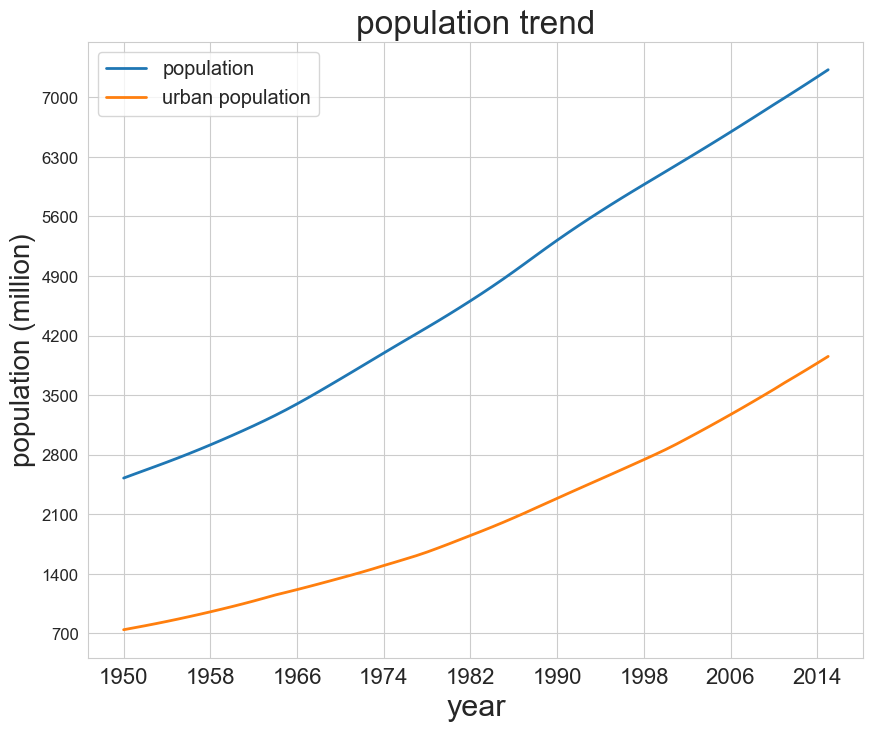

In [46]:
plt.figure(figsize=(10,8));
plt.plot(df_pop.year, df_pop.world, linewidth=2);
plt.plot(df_ur.year, df_ur.urban, linewidth=2);
plt.xticks(np.arange(1950,2015,8),fontsize=16);
plt.yticks(np.arange(700,7700,700), fontsize=12);
plt.xlabel('year',fontsize=22)
plt.ylabel('population (million)', fontsize=20)
plt.title('population trend', fontsize=24)
plt.legend(('population','urban population'), loc='upper left', fontsize='x-large');


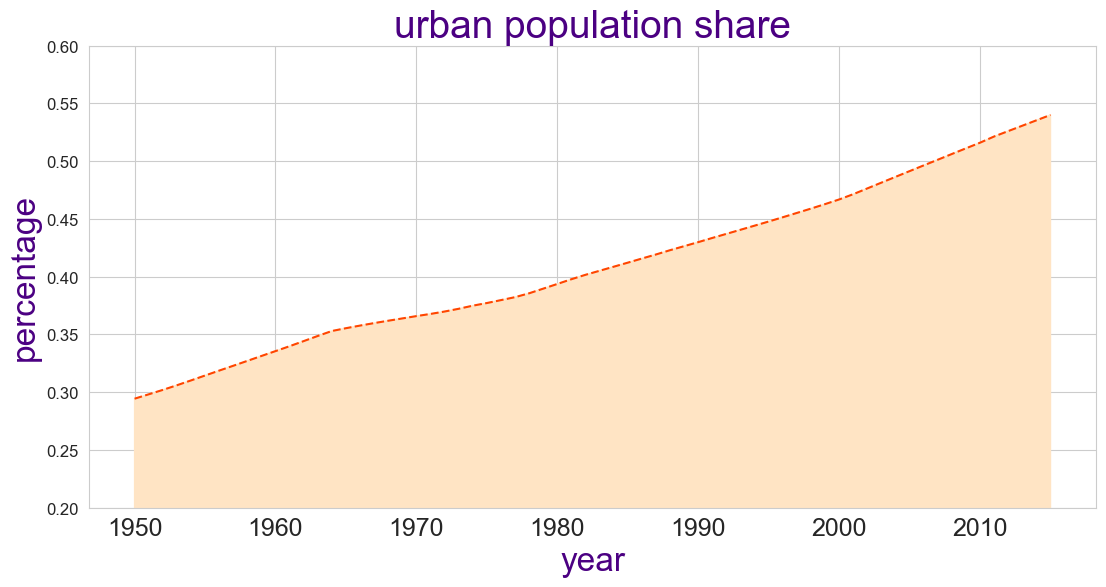

In [47]:
plt.figure(figsize=(13,6))
plt.plot(df_ur.urban/df_pop.world, 'k--', color='orangered')
plt.fill_between((df_ur.urban/df_pop.world).index, (df_ur.urban/df_pop.world).values, color='bisque')
plt.ylim([0.2, 0.6])
plt.xticks(fontsize=18);
plt.xlabel('year',fontsize=24, color='indigo')
plt.ylabel('percentage', fontsize=24, color='indigo')
plt.title('urban population share', fontsize=28, color='indigo')
plt.yticks(fontsize=12);

In [48]:
dfy1959 = dfy.loc[1959:]
diff_y1959 = dfy1959.diff().rename(columns={'LandAverageTemperature':'diff'})

In [49]:
test = adfuller(diff_y1959['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -6.277626e+00
p-value                        3.865698e-08
#Lags Used                     6.000000e+00
Number of Observations Used    4.900000e+01
dtype: float64


In [50]:
diff_y1753 = dfy.diff().rename(columns={'LandAverageTemperature':'diff'})
test = adfuller(diff_y1753['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -7.055063e+00
p-value                        5.401892e-10
#Lags Used                     1.600000e+01
Number of Observations Used    2.450000e+02
dtype: float64


In [51]:
dfm1959 = df.LandAverageTemperature[(1959-1753)*12:]
dfm1959 = pd.DataFrame(dfm1959.values, index=dfm1959.index, columns=['Temp'])

In [52]:
diff_m1959 = dfm1959.diff().rename(columns={'Temp':'diff'})
test = adfuller(diff_m1959['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -9.134084e+00
p-value                        2.967951e-15
#Lags Used                     2.000000e+01
Number of Observations Used    6.620000e+02
dtype: float64


In [53]:
dfm1753 = pd.DataFrame(df.LandAverageTemperature.values, index=df.index, columns=['Temp'])
diff_m1753 = dfm1753.diff().rename(columns={'Temp':'diff'})
test = adfuller(diff_m1753['diff'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)

Test Statistic                -1.601077e+01
p-value                        6.359565e-29
#Lags Used                     2.700000e+01
Number of Observations Used    3.127000e+03
dtype: float64


In [54]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

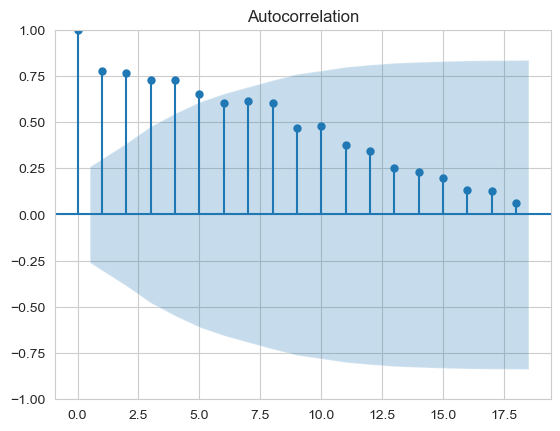

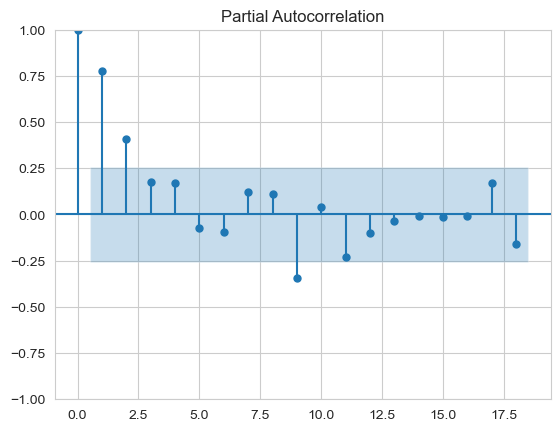

In [55]:
xxx = plot_acf(dfy1959, alpha=.05)
yyy = plot_pacf(dfy1959, alpha=.05)

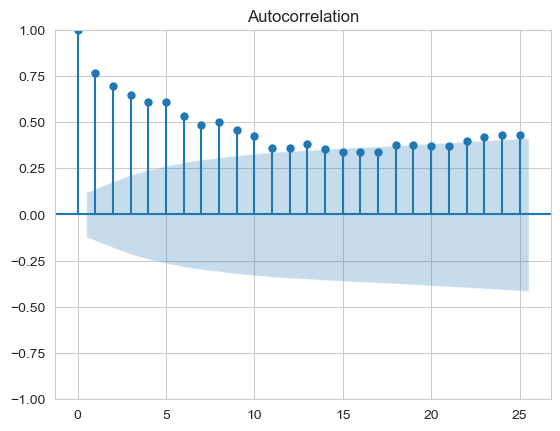

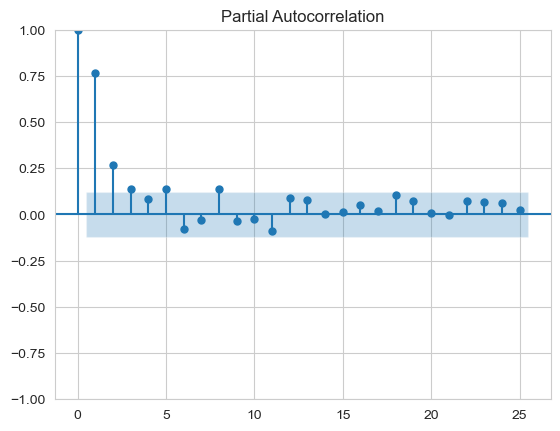

In [56]:
xxx = plot_acf(dfy, alpha=.05)
yyy = plot_pacf(dfy, alpha=.05)

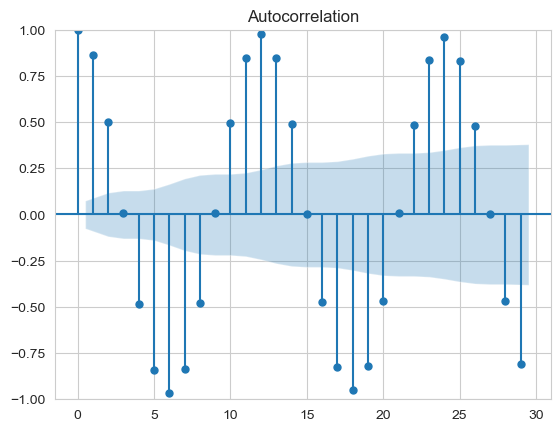

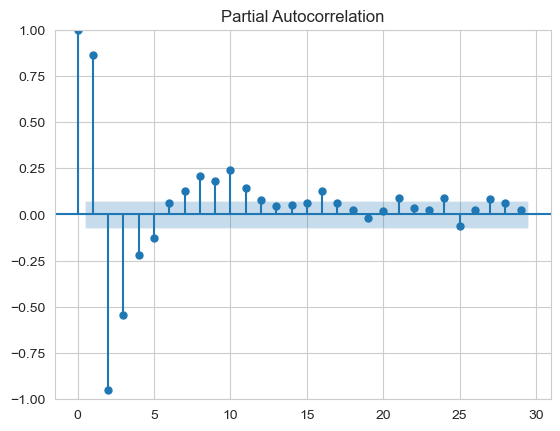

In [57]:
xxx = plot_acf(dfm1959, alpha=.05)
yyy = plot_pacf(dfm1959, alpha=.05)

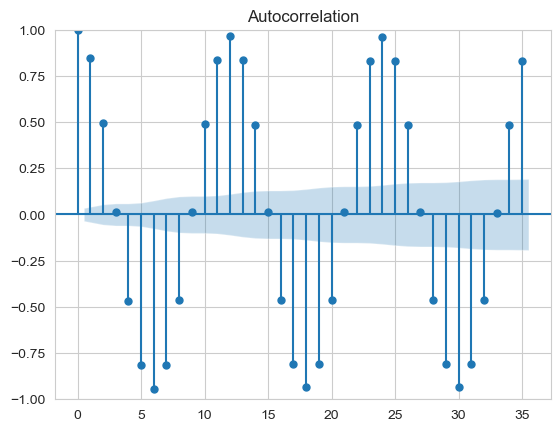

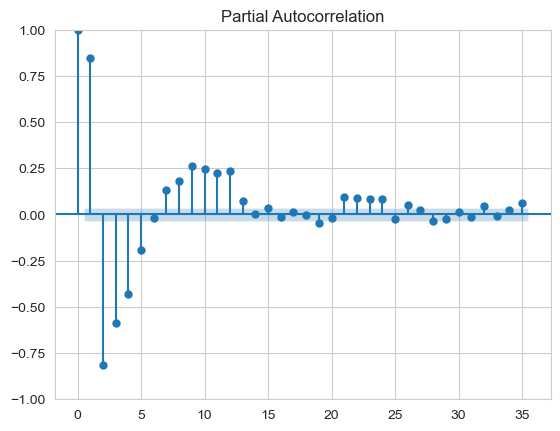

In [58]:
xxx = plot_acf(dfm1753, alpha=.05)
yyy = plot_pacf(dfm1753, alpha=.05)

In [59]:
dfy1959_train = dfy1959.LandAverageTemperature[:round(len(dfy1959)*0.8)]
dfy1959_test = dfy1959.LandAverageTemperature[round(len(dfy1959)*0.8):]
len(dfy1959_test)

11

In [60]:
m_sarimax1959 = sm.tsa.statespace.SARIMAX(endog = dfy1959_train, order=(5,1,8))
m_sarimax_fit1959 = m_sarimax1959.fit()


In [61]:
m_sarimax_foca1959 = m_sarimax_fit1959.forecast(11)
print('MSE:', mean_squared_error(dfy1959_test, m_sarimax_foca1959))
print('RMSE:', np.sqrt(mean_squared_error(dfy1959_test, m_sarimax_foca1959)))
print('MAE:', mean_absolute_error(dfy1959_test, m_sarimax_foca1959))

MSE: 0.015915975810254203
RMSE: 0.12615853443288808
MAE: 0.10384405818774231


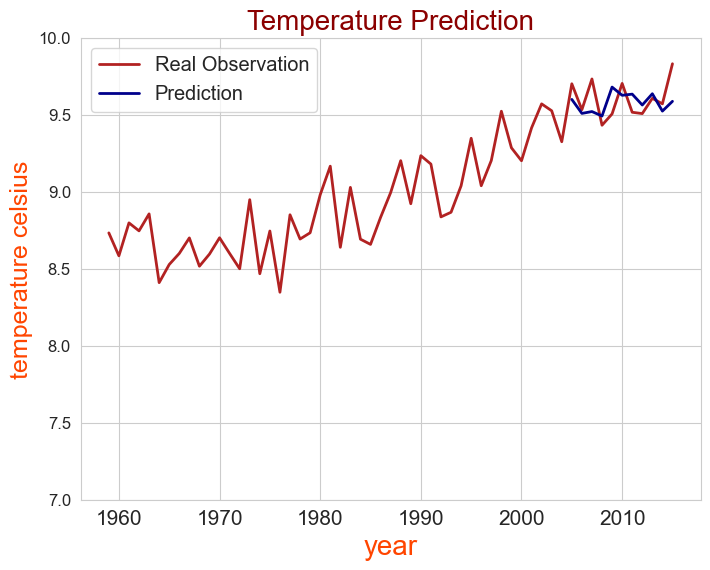

In [62]:
dfy1959.plot(figsize=(8,6), linewidth=2, color='firebrick')
plt.plot(range(2005,2016), m_sarimax_foca1959, linewidth=2, color='darkblue')
plt.ylim([7,10])
plt.xlabel('year',fontsize=20, color='orangered')
plt.ylabel('temperature celsius', fontsize=18, color='orangered')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title('Temperature Prediction', fontsize=20, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

In [63]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.925)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.925):]
len(dfy_test)

20

In [64]:
m_sarimax = sm.tsa.statespace.SARIMAX(endog = dfy_train, order=(3,2,3))
m_sarimax_fit = m_sarimax.fit()

In [65]:
m_sarimax_foca = m_sarimax_fit.forecast(20)
print('MSE:', mean_squared_error(dfy_test, m_sarimax_foca))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_sarimax_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_sarimax_foca))

MSE: 0.057844627861354435
RMSE: 0.2405091014106419
MAE: 0.2094338685660806


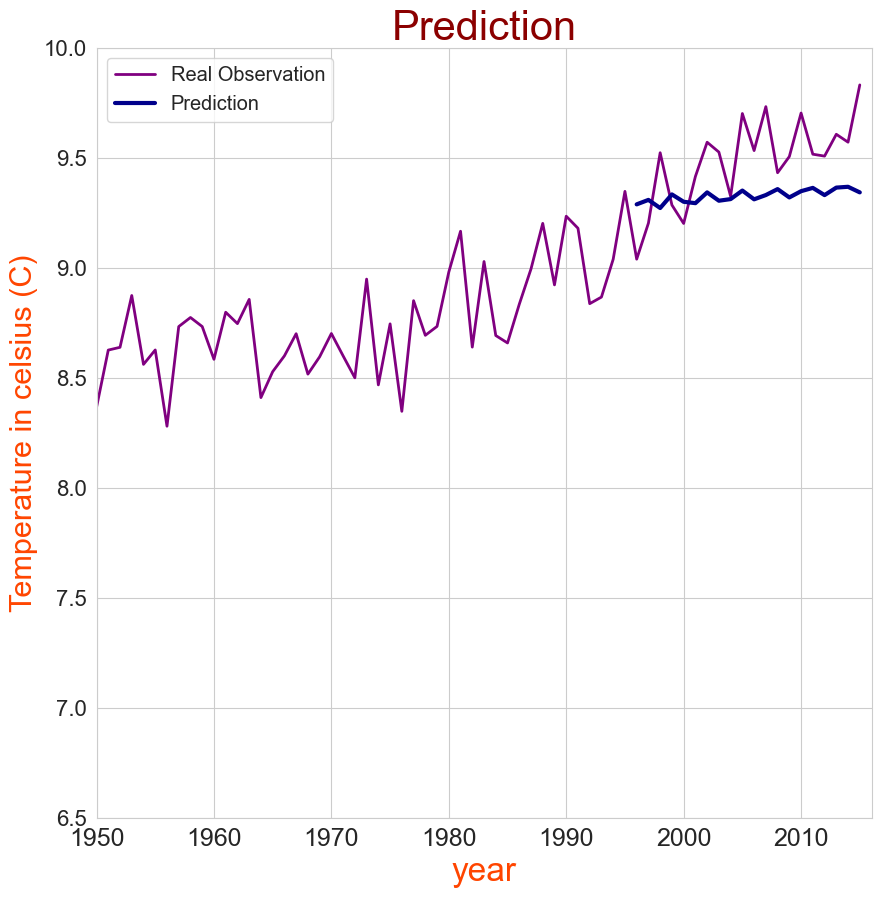

In [66]:
dfy.plot(figsize=(10,10), linewidth=2, color='purple')
plt.xlim([1950,2016])
plt.plot(range(1996,2016), m_sarimax_foca, linewidth=3, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [67]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.925)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.925):]
len(dfy_test)

20

In [68]:
m_auto = pm.auto_arima(dfy_train, start_p=3, start_d=2, start_q=3, max_p=10, max_d=3, max_q=10,
                             seasonal = False,
                             d=None, D=None, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=175.438, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=230.997, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=199.555, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=181.687, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=229.023, Time=0.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=178.350, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=176.226, Time=0.34 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=174.557, Time=0.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=179.874, Time=0.23 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=170.694, Time=0.45 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=181.843, Time=0.41 sec
 ARIMA(6,1,3)(0,0,0)[0] intercept   : AIC=172.768, Time=0.52 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=172.049, Time=0.50 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=182.197, Time=0.44 sec
 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=173.8

In [69]:
m_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(6, 1, 3)   Log Likelihood                 -74.140
Date:                Fri, 24 Nov 2023   AIC                            168.280
Time:                        08:28:24   BIC                            203.169
Sample:                             0   HQIC                           182.335
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6929      0.107      6.506      0.000       0.484       0.902
ar.L2         -0.7010      0.135     -5.187      0.000      -0.966      -0.436
ar.L3          0.2869      0.078      3.668      0.000       0.134       0.440
ar.L4          0.0931      0.075      1.237      0.216      -0.054       0.241
ar.L5          0.1651      0.068      2.413      0.016       0.031       0.299
ar.L6         -0.1690      0.059     -2.858      0.004      -0.285      -0.053
ma.L1         -1.2375      0.110    -11.247      0.000      -1.453      -1.022
ma.L2          1.0309      0.167      6.177      0.000       0.704       1.358
ma.L3         -0.7120      0.117     -6.069      0.000      -0.942      -0.482
sigma2         0.1072      0.006     16.785      0.000       0.095       0.120
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               317.11
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
m_auto_foca = m_auto.predict(20)
print('MSE:', mean_squared_error(dfy_test, m_auto_foca))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_auto_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_auto_foca))

MSE: 0.38021330906486694
RMSE: 0.616614392521669
MAE: 0.5710585580147036


ValueError: x and y must have same first dimension, but have shapes (12,) and (20,)

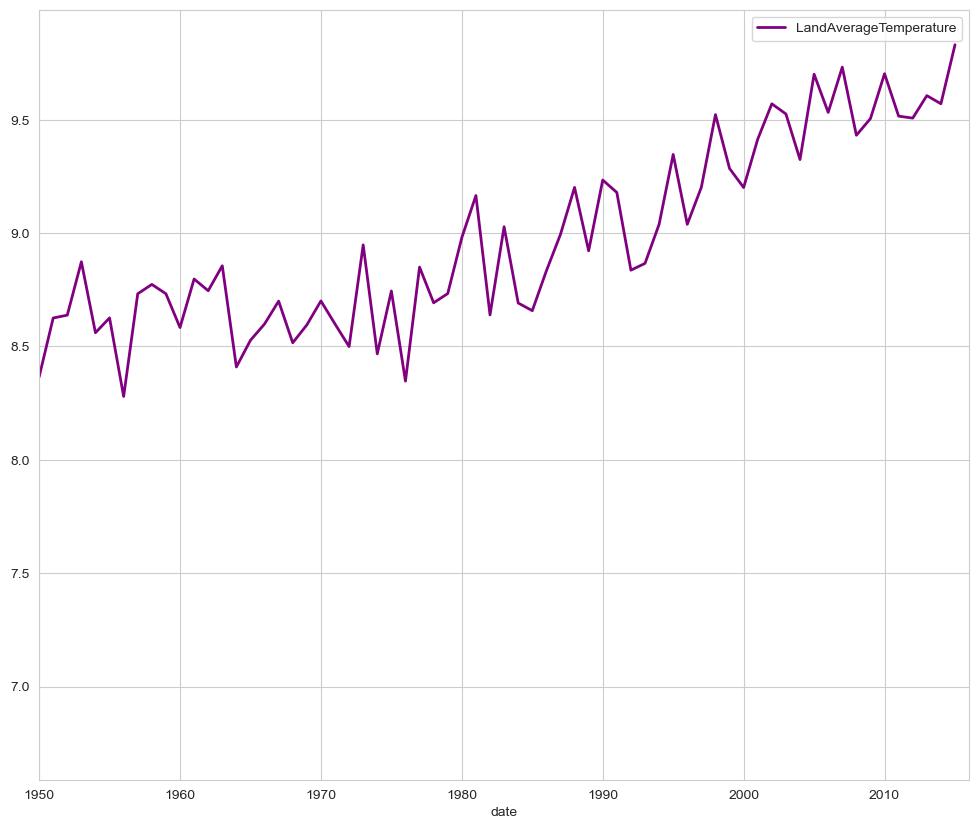

In [76]:
dfy.plot(figsize=(12,10), linewidth=2, color='purple')
plt.xlim([1950,2016])
plt.plot(range(104,2016), m_auto_foca, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title(' Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [68]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
len(dfy_test)

53

In [79]:
orderlist = []
mselist = []
rmselist = []
maelist = []
for p in range(1,16):
    for d in range(1,3):
        for q in range(1,16):
            ordernow = (p,d,q)
            m_sarimax_now = sm.tsa.statespace.SARIMAX(endog = dfy_train, order=ordernow).fit()
            orderlist.append(ordernow)
            maelist.append(mean_absolute_error(dfy_test, m_sarimax_now.forecast(53)))
            rmselist.append(np.sqrt(mean_squared_error(dfy_test, m_sarimax_now.forecast(53))))
            mselist.append(mean_squared_error(dfy_test, m_sarimax_now.forecast(53)))


In [80]:
df_sarimax = pd.DataFrame()
df_sarimax['order'], df_sarimax['mse'], df_sarimax['rmse'], df_sarimax['mae'] = orderlist, mselist, rmselist, maelist
df_sarimax.sort_values('rmse').head()

,order,mse,rmse,mae
86,"(3, 2, 12)",0.076515,0.276613,0.239981
88,"(3, 2, 14)",0.077050,0.277579,0.236923
89,"(3, 2, 15)",0.078926,0.280937,0.240816
22,"(1, 2, 8)",0.078968,0.281013,0.243250
84,"(3, 2, 10)",0.079026,0.281116,0.242964


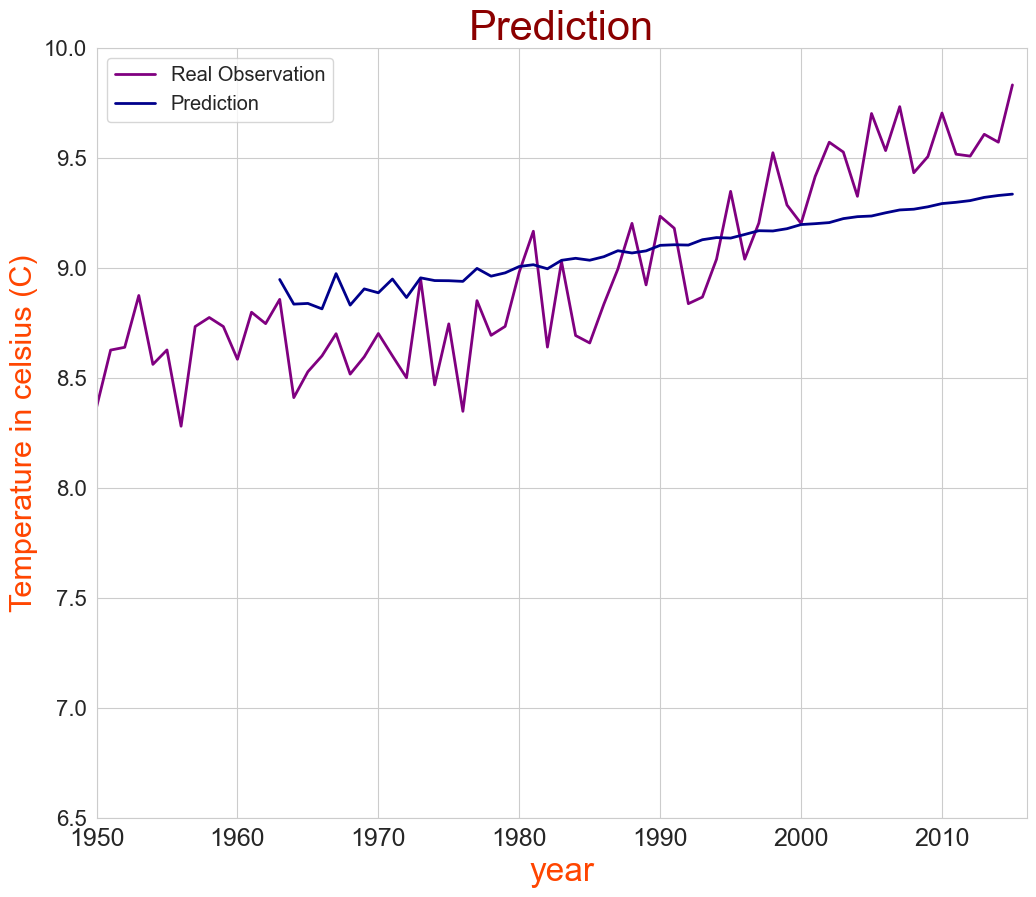

In [69]:
sarimax_best = sm.tsa.statespace.SARIMAX(endog = dfy_train, order=(3,2,12)).fit()
dfy.plot(figsize=(12,10), linewidth=2, color='purple')
plt.xlim([1950,2016])
plt.plot(range(1963,2016), sarimax_best.forecast(53), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [70]:
def cointest(y1, y2):
    results = ts.coint(y1, y2)
    print('t-statistic:', results[0])
    print('pvalue:', results[1])
    print('crit_value for 1%, 5% and 10%:', results[2])
cointest(dfy, df_co1753)

t-statistic: -5.993078321959255
pvalue: 1.6802627645496317e-06
crit_value for 1%, 5% and 10%: [-3.93872956 -3.35955039 -3.06067741]


In [71]:
df_co1753

1753    277.263000
1754    277.304000
1755    277.351000
1756    277.389000
1757    277.442000
           ...    
2011    390.944015
2012    393.015993
2013    395.724979
2014    397.546977
2015    399.851668
Name: data_mean_global, Length: 263, dtype: float64

In [72]:
cointest(dfy[200:], df_co1753[200:]) 

t-statistic: -7.911700294762646
pvalue: 5.031094632076183e-11
crit_value for 1%, 5% and 10%: [-4.08180545 -3.43645497 -3.11356405]


In [73]:
cointest(dfy[210:], df_co1753[210:])

t-statistic: -1.8488549452783287
pvalue: 0.6057025871401797
crit_value for 1%, 5% and 10%: [-4.1194525  -3.45615522 -3.12701746]


In [74]:
for i in range(20):
    print('CO2 pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_co1753[197+i:])[1])


CO2 pvalue counted from 1950 : 0.4271848354393046
CO2 pvalue counted from 1951 : 2.899490749433564e-10
CO2 pvalue counted from 1952 : 0.5627436566779909
CO2 pvalue counted from 1953 : 5.031094632076183e-11
CO2 pvalue counted from 1954 : 0.4572807882079943
CO2 pvalue counted from 1955 : 0.2440867653474471
CO2 pvalue counted from 1956 : 0.3243884127450594
CO2 pvalue counted from 1957 : 0.6555231906545617
CO2 pvalue counted from 1958 : 0.6760721479648355
CO2 pvalue counted from 1959 : 0.5139203588960153
CO2 pvalue counted from 1960 : 0.4858719906015745
CO2 pvalue counted from 1961 : 2.3127890037381242e-10
CO2 pvalue counted from 1962 : 7.260423991351764e-11
CO2 pvalue counted from 1963 : 0.6057025871401797
CO2 pvalue counted from 1964 : 0.565180387805041
CO2 pvalue counted from 1965 : 9.519126510441878e-11
CO2 pvalue counted from 1966 : 1.418317434677719e-10
CO2 pvalue counted from 1967 : 1.1600564934188958e-10
CO2 pvalue counted from 1968 : 3.020953585210236e-10
CO2 pvalue counted from 1

In [75]:
for i in range(20):
    print('total population pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_pop.world[i:])[1])

total population pvalue counted from 1950 : 0.5668832254085764
total population pvalue counted from 1951 : 0.5983257331927524
total population pvalue counted from 1952 : 0.4034552153131147
total population pvalue counted from 1953 : 0.4434281780160355
total population pvalue counted from 1954 : 0.4413693559389838
total population pvalue counted from 1955 : 0.34151359802660636
total population pvalue counted from 1956 : 0.4407378906081501
total population pvalue counted from 1957 : 0.7510623429278219
total population pvalue counted from 1958 : 0.7568326495233789
total population pvalue counted from 1959 : 0.602344008912707
total population pvalue counted from 1960 : 0.6175444277881385
total population pvalue counted from 1961 : 0.6385808579563866
total population pvalue counted from 1962 : 0.6765447737330126
total population pvalue counted from 1963 : 0.6740148791783039
total population pvalue counted from 1964 : 0.589593610710148
total population pvalue counted from 1965 : 0.7221730344

In [76]:
for i in range(20):
    print('urban population pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_ur.urban[i:])[1])

urban population pvalue counted from 1950 : 0.426746916662354
urban population pvalue counted from 1951 : 1.0678189974733723e-09
urban population pvalue counted from 1952 : 0.268547301174515
urban population pvalue counted from 1953 : 1.0149982308265016e-10
urban population pvalue counted from 1954 : 0.41406025694735293
urban population pvalue counted from 1955 : 0.20240760339145497
urban population pvalue counted from 1956 : 0.28164764268800235
urban population pvalue counted from 1957 : 0.6189173962266192
urban population pvalue counted from 1958 : 0.6334299036951202
urban population pvalue counted from 1959 : 0.46395761217524334
urban population pvalue counted from 1960 : 0.43777442529423577
urban population pvalue counted from 1961 : 0.5577304731127022
urban population pvalue counted from 1962 : 0.5500107302090271
urban population pvalue counted from 1963 : 0.5513054410959708
urban population pvalue counted from 1964 : 0.5299322700475312
urban population pvalue counted from 1965 : 

In [77]:
for i in range(20):
    print('rural population pvalue counted from', str(1950+i), ':', ts.coint(dfy[197+i:], df_ur.rural[i:])[1])

rural population pvalue counted from 1950 : 0.7463761062684484
rural population pvalue counted from 1951 : 0.7638772525596067
rural population pvalue counted from 1952 : 0.640159604903708
rural population pvalue counted from 1953 : 0.683251429388022
rural population pvalue counted from 1954 : 0.7568616540795045
rural population pvalue counted from 1955 : 0.8505282035897095
rural population pvalue counted from 1956 : 0.8601751189953885
rural population pvalue counted from 1957 : 0.8623206182086482
rural population pvalue counted from 1958 : 0.9429019168789301
rural population pvalue counted from 1959 : 0.9058214387726407
rural population pvalue counted from 1960 : 0.9074975971026376
rural population pvalue counted from 1961 : 0.9400676306362149
rural population pvalue counted from 1962 : 0.746747284133373
rural population pvalue counted from 1963 : 0.941446473079673
rural population pvalue counted from 1964 : 0.9259668824028017
rural population pvalue counted from 1965 : 0.8599927790192

In [78]:
df_tc = pd.DataFrame(index=dfy.index)
df_tc['Temp'], df_tc['co2'] = dfy['LandAverageTemperature'], df_co1753.values

In [79]:
coint_johansen(df_tc,0,1).lr1

array([118.99240907,  41.64554317])

In [80]:
coint_johansen(df_tc,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [81]:
df_tp = pd.DataFrame(index=dfy[197:].index)
df_tp['Temp'], df_tp['population'] = dfy['LandAverageTemperature'][197:], df_pop.world.values

In [82]:
coint_johansen(df_tp,0,1).lr1

array([30.51972775,  1.91290122])

In [83]:
coint_johansen(df_tp,0,1).cvt

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [84]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
df_co_train = df_co1753[:round(len(df_co1753)*0.8)]
df_co_test = df_co1753[round(len(df_co1753)*0.8):]
len(dfy_test), len(df_co_test)

(53, 53)

In [85]:
m_arimax = sm.tsa.statespace.SARIMAX(dfy_train, exog=df_co_train, order=(8,1,16))
m_arimax_fit = m_arimax.fit()
print(m_arimax_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                  210
Model:                  SARIMAX(8, 1, 16)   Log Likelihood                 -59.835
Date:                    Fri, 24 Nov 2023   AIC                            171.670
Time:                            19:04:08   BIC                            258.571
Sample:                                 0   HQIC                           206.804
                                    - 210                                         
Covariance Type:                      opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
data_mean_global     0.0168      0.014      1.241      0.215      -0.010       0.043
ar.L1               -0.7818      0.714     -1.095      0.273      -2.181       0.

In [86]:
m_arimax_foca = m_arimax_fit.forecast(steps=53, exog=df_co_test)
print('MSE:', mean_squared_error(dfy_test, m_arimax_foca))
print('RMSE:', np.sqrt(mean_squared_error(dfy_test, m_arimax_foca)))
print('MAE:', mean_absolute_error(dfy_test, m_arimax_foca))

MSE: 0.07789639957872387
RMSE: 0.2790992647405648
MAE: 0.23381418914514424


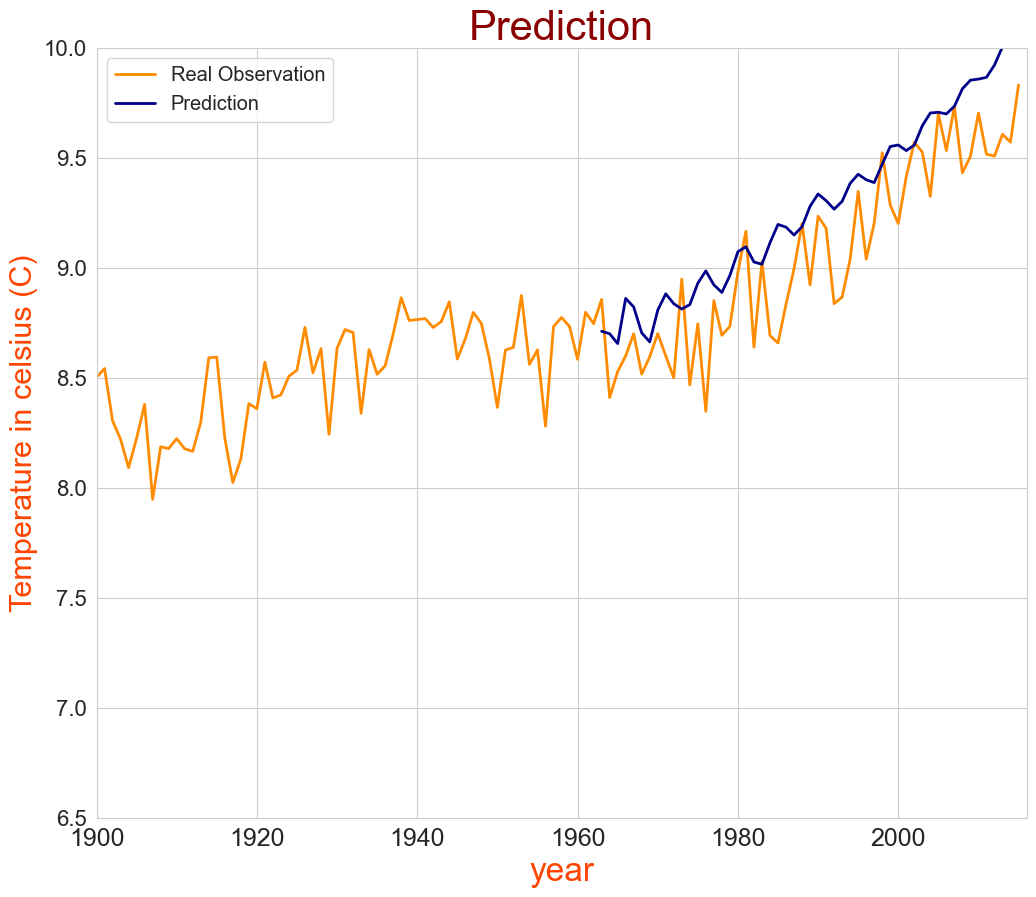

In [87]:
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(1963,2016), m_arimax_foca, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')

In [88]:
dfy_train = dfy.LandAverageTemperature[:round(len(dfy)*0.8)]
dfy_test = dfy.LandAverageTemperature[round(len(dfy)*0.8):]
df_co_train = df_co1753[:round(len(df_co1753)*0.8)]
df_co_test = df_co1753[round(len(df_co1753)*0.8):]
len(dfy_test), len(df_co_test)

(53, 53)

In [101]:
orderlist1 = []
mselist1 = []
rmselist1 = []
maelist1 = []
for p in range(1,16):
    for d in range(1,3):
        for q in range(1,16):
            ordernow = (p,d,q)
            m_arimax_exo_now = sm.tsa.statespace.SARIMAX(endog = dfy_train, exog=df_co_train, order=ordernow,
                                                         initialization='approximate_diffuse').fit()
            orderlist1.append(ordernow)
            foca_now = m_arimax_exo_now.forecast(steps=53, exog=df_co_test)
            maelist1.append(mean_absolute_error(dfy_test, foca_now))
            rmselist1.append(np.sqrt(mean_squared_error(dfy_test, foca_now)))
            mselist1.append(mean_squared_error(dfy_test, foca_now))

In [102]:
df_arimax_exo = pd.DataFrame()
df_arimax_exo['order'], df_arimax_exo['mse'], df_arimax_exo['rmse'], df_arimax_exo['mae'] = orderlist1, mselist1, rmselist1, maelist1
df_arimax_exo.sort_values('rmse').head()

,order,mse,rmse,mae
436,"(15, 2, 2)",0.043172,0.207778,0.171227
354,"(12, 2, 10)",0.050015,0.223639,0.188563
259,"(9, 2, 5)",0.054972,0.234461,0.200562
310,"(11, 1, 11)",0.066111,0.257120,0.214046
154,"(6, 1, 5)",0.066609,0.258088,0.214439


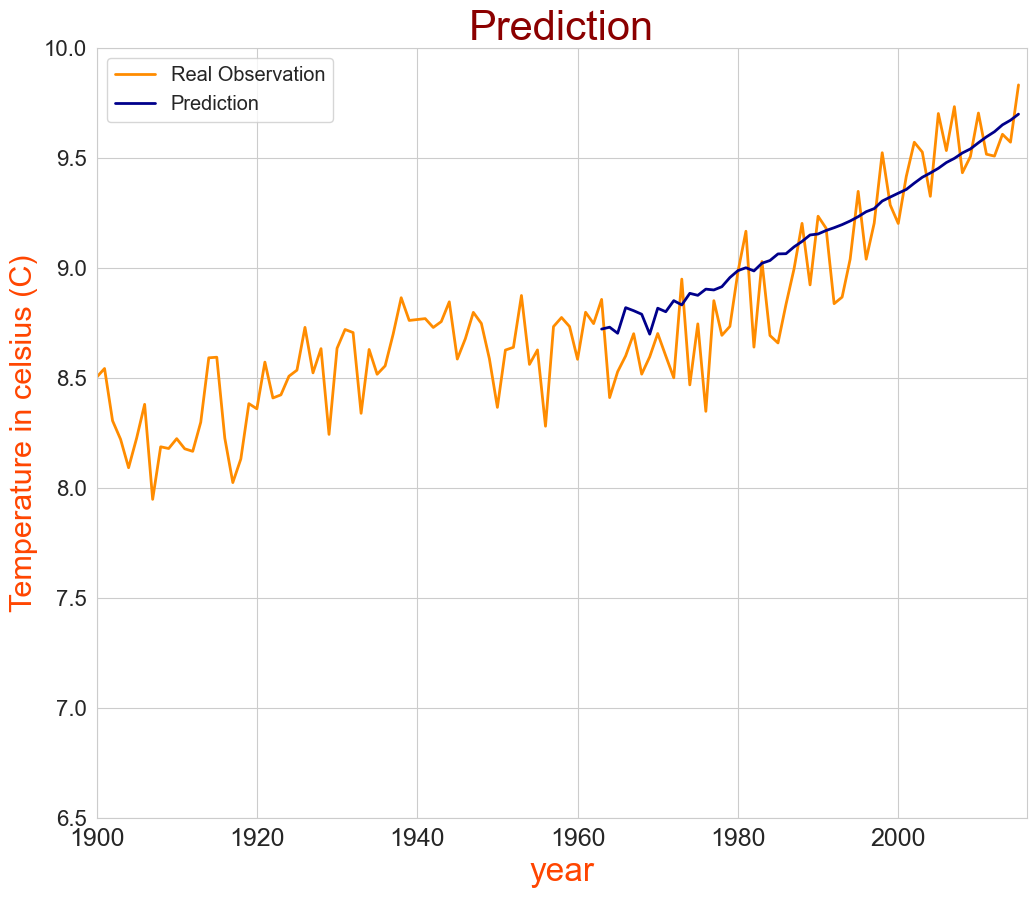

In [89]:
arimax_exo_best = sm.tsa.statespace.SARIMAX(endog = dfy_train, exog=df_co_train, order=(15,2,2), initialization='approximate_diffuse').fit()
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(1963,2016), arimax_exo_best.forecast(steps=53, exog=df_co_test), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [90]:
df_tcr = pd.DataFrame(index=dfy['LandAverageTemperature'][197:].index)
df_tcr['Temp'], df_tcr['co2'], df_tcr['urban'] = dfy['LandAverageTemperature'][197:], df_coh['data_mean_global'][1950:], df_ur['urban'].values
round(len(df_tcr)*0.8), len(df_tcr)-round(len(df_tcr)*0.8)

(53, 13)

In [91]:
temp_train = df_tcr.Temp[:53]
temp_test = df_tcr.Temp[53:]
co2_train = df_tcr.co2[:53]
co2_test = df_tcr.co2[53:]
urban_train = df_tcr.urban[:53]
urban_test = df_tcr.urban[53:]

In [106]:
orderlist2 = []
mselist2 = []
rmselist2 = []
maelist2 = []
for p in range(1,13):
    for d in range(1,3):
        for q in range(1,13):
            ordernow = (p,d,q)
            m_arimax_co2_now = sm.tsa.statespace.SARIMAX(endog = temp_train, exog=co2_train, order=ordernow,
                                                         initialization='approximate_diffuse').fit()
            orderlist2.append(ordernow)
            foca_now = m_arimax_co2_now.forecast(steps=13, exog=co2_test)
            maelist2.append(mean_absolute_error(temp_test, foca_now))
            rmselist2.append(np.sqrt(mean_squared_error(temp_test, foca_now)))
            mselist2.append(mean_squared_error(temp_test, foca_now))

In [107]:
df_arimax_co2 = pd.DataFrame()
df_arimax_co2['order'], df_arimax_co2['mse'], df_arimax_co2['rmse'], df_arimax_co2['mae'] = orderlist2, mselist2, rmselist2, maelist2
df_arimax_co2.sort_values('rmse').head()

,order,mse,rmse,mae
75,"(4, 1, 4)",0.015106,0.122905,0.110917
51,"(3, 1, 4)",0.016493,0.128426,0.120025
28,"(2, 1, 5)",0.016695,0.129210,0.115906
25,"(2, 1, 2)",0.017071,0.130655,0.120158
74,"(4, 1, 3)",0.017159,0.130991,0.106306


In [108]:
df_arimax_co2.sort_values('mae').head()

,order,mse,rmse,mae
52,"(3, 1, 5)",0.019364,0.139155,0.103069
53,"(3, 1, 6)",0.017430,0.132021,0.104638
74,"(4, 1, 3)",0.017159,0.130991,0.106306
123,"(6, 1, 4)",0.018175,0.134815,0.108062
77,"(4, 1, 6)",0.020316,0.142536,0.109216


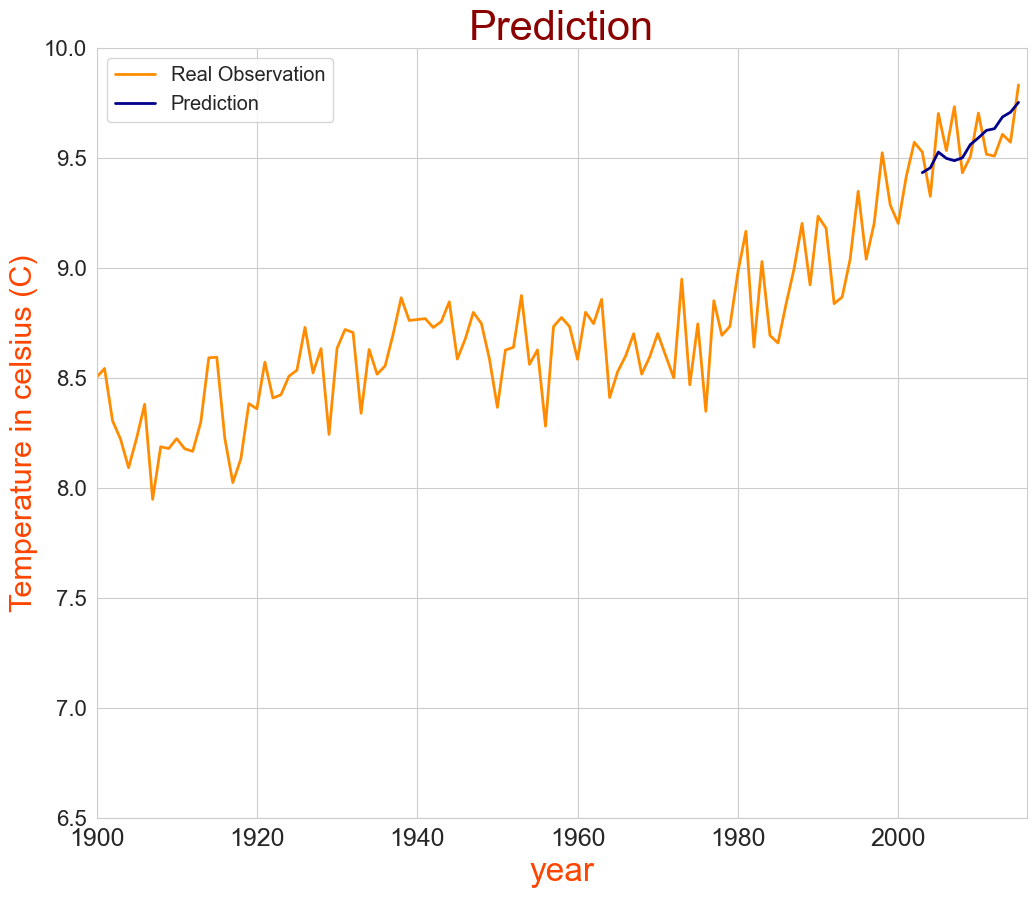

In [92]:
arimax_co2_best = sm.tsa.statespace.SARIMAX(endog = temp_train, exog=co2_train, order=(4,1,4), initialization='approximate_diffuse').fit()
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(2003,2016), arimax_co2_best.forecast(steps=13, exog=co2_test), linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [93]:
maxlag=12
# define the Granger Causality test function
def grangers_causation_matrix(data, variables, test3='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df3 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df3.columns:
        for r in df3.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test3][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df3.loc[r, c] = min_p_value
    df3.columns = [var + '_x' for var in variables]
    df3.index = [var + '_y' for var in variables]
    return df3

In [94]:
grangers_causation_matrix(data = df_tc, variables = df_tc.columns)

,Temp_x,co2_x
Temp_y,1.0000,0.0
co2_y,0.1971,1.0


In [95]:
df_tc_diff = df_tc.diff()

In [96]:
grangers_causation_matrix(data = df_tc_diff[1:], variables = df_tc_diff[1:].columns)

,Temp_x,co2_x
Temp_y,1.0000,0.1275
co2_y,0.1751,1.0000


In [97]:
grangers_causation_matrix(data = df_tcr, variables = df_tcr.columns)


,Temp_x,co2_x,urban_x
Temp_y,1.0000,0.0,0.0
co2_y,0.0006,1.0,0.0
urban_y,0.0000,0.0,1.0


In [98]:
df_tc_train = df_tc[:round(len(dfy)*0.8)]
df_tc_test = df_tc[round(len(dfy)*0.8):]

In [99]:
len(df_tc_train), len(df_tc_test)

(210, 53)

In [100]:
m_multi_tc = VAR(endog=df_tc_train)

In [120]:
laglist4 = []
mselist4 = []
rmselist4 = []
maelist4 = []
for i in ([None] + list(range(1,30))):
    m_multi_tc_fit = m_multi_tc.fit(i)
    foca_now = m_multi_tc_fit.forecast(m_multi_tc.y, steps=53)[:,0]
    laglist4.append(i)
    maelist4.append(mean_absolute_error(df_tc_test['Temp'], foca_now))
    rmselist4.append(np.sqrt(mean_squared_error(df_tc_test['Temp'], foca_now)))
    mselist4.append(mean_squared_error(df_tc_test['Temp'], foca_now))

In [121]:
df_multi_tc = pd.DataFrame()
df_multi_tc['lag'], df_multi_tc['mse'], df_multi_tc['rmse'], df_multi_tc['mae'] = laglist4, mselist4, rmselist4, maelist4
df_multi_tc.sort_values('rmse').head()

,lag,mse,rmse,mae
2,2.0,0.056062,0.236773,0.204433
5,5.0,0.058439,0.241742,0.207781
4,4.0,0.059278,0.243470,0.210999
3,3.0,0.059355,0.243629,0.211043
12,12.0,0.060737,0.246449,0.211506


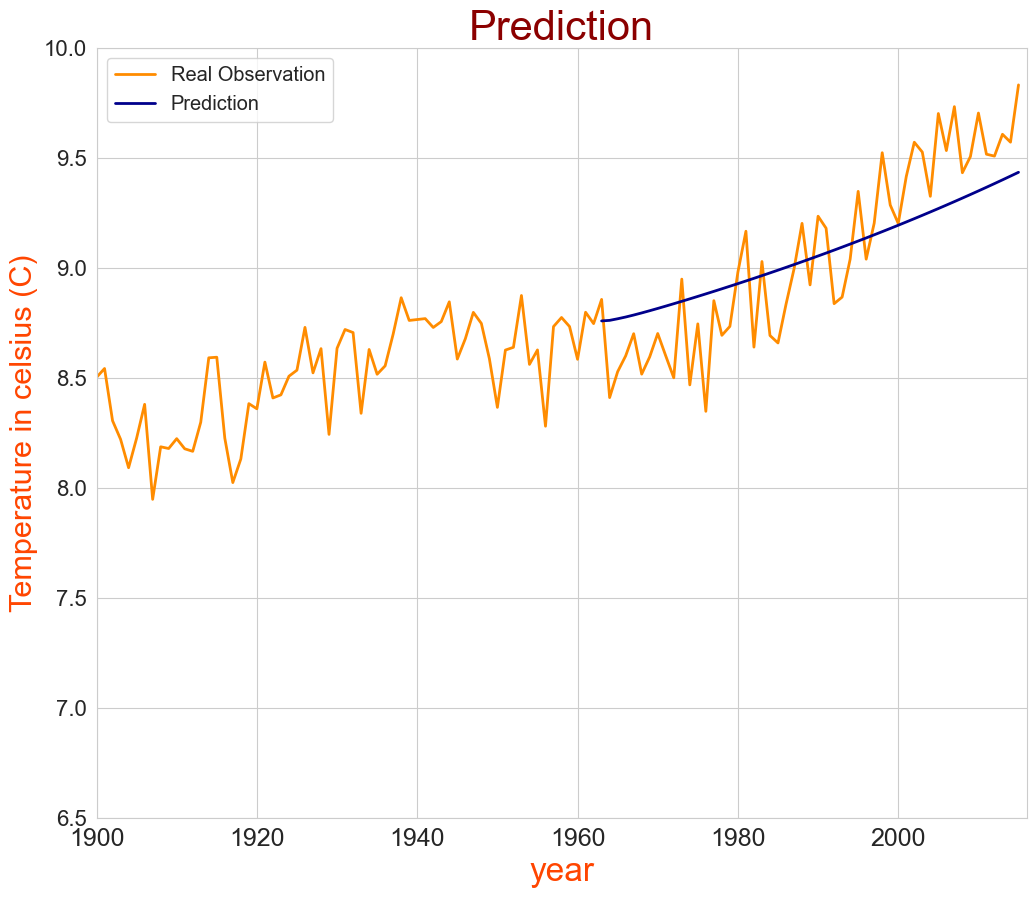

In [101]:
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(1963,2016), m_multi_tc.fit(2).forecast(m_multi_tc.y, steps=53)[:,0], linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [102]:
hyperlist6 = []
mselist6 = []
rmselist6 = []
maelist6 = []
for d in range(1,30):
    for de in ['nc','co','ci','lo','li']:
        m_vecm_tc = VECM(endog=df_tc_train, k_ar_diff=d, deterministic=de, coint_rank=1)
        m_vecm_tc_fit= m_vecm_tc.fit(method='ml')
        pred_vecm = m_vecm_tc_fit.predict(steps=53)[:,0]
        hyperlist6.append((d, de))
        maelist6.append(mean_absolute_error(df_tc_test['Temp'], pred_vecm))
        rmselist6.append(np.sqrt(mean_squared_error(df_tc_test['Temp'], pred_vecm)))
        mselist6.append(mean_squared_error(df_tc_test['Temp'], pred_vecm))

In [103]:
df_vecm_tc = pd.DataFrame()
df_vecm_tc['hyper'], df_vecm_tc['mse'], df_vecm_tc['rmse'], df_vecm_tc['mae'] = hyperlist6, mselist6, rmselist6, maelist6


In [100]:
df_vecm_tc.sort_values('rmse').head()

,hyper,mse,rmse,mae
30,"(7, nc)",0.034986,0.187046,0.153980
20,"(5, nc)",0.035290,0.187857,0.152373
35,"(8, nc)",0.036069,0.189918,0.159306
25,"(6, nc)",0.036727,0.191643,0.153780
40,"(9, nc)",0.038557,0.196360,0.166242


In [101]:
df_vecm_tc.sort_values('mae').head()

,hyper,mse,rmse,mae
20,"(5, nc)",0.035290,0.187857,0.152373
25,"(6, nc)",0.036727,0.191643,0.153780
30,"(7, nc)",0.034986,0.187046,0.153980
35,"(8, nc)",0.036069,0.189918,0.159306
45,"(10, nc)",0.040752,0.201870,0.164770


In [104]:
m_vecm_tc_best = VECM(endog=df_tc_train, k_ar_diff=7, deterministic='nc', coint_rank=1)
m_vecm_tc_bestfit= m_vecm_tc_best.fit(method='ml')
pred_vecm_best = m_vecm_tc_bestfit.predict(steps=53)[:,0]

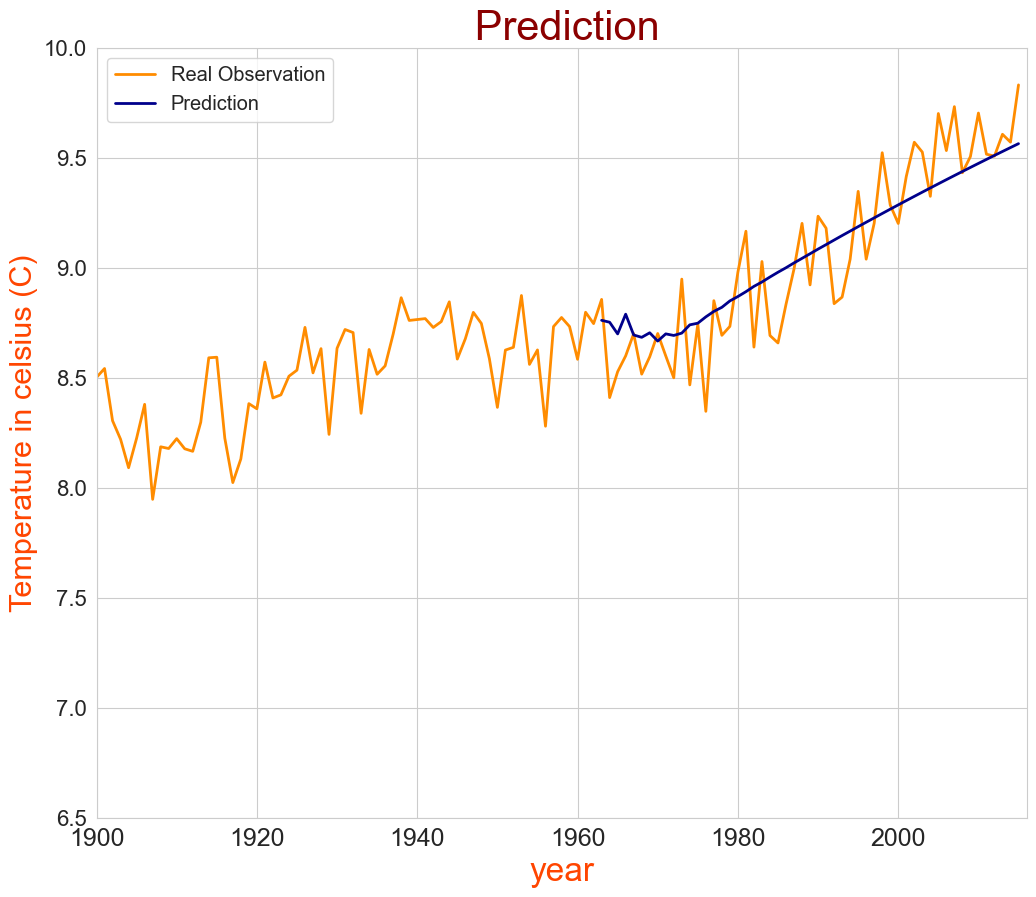

In [105]:
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(1963,2016), pred_vecm_best, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title(' Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [106]:
round(len(df_tcr)*0.8), len(df_tcr)-round(len(df_tcr)*0.8)

(53, 13)

In [107]:
df_tcr_train = df_tcr[:53]
df_tcr_test = df_tcr[53:]

In [108]:
hyperlist7 = []
mselist7 = []
rmselist7 = []
maelist7 = []
for d in range(1,30):
    for de in ['nc','co','ci','lo','li']:
        m_vecm_tcr = VECM(endog=df_tcr_train, k_ar_diff=d, deterministic=de, coint_rank=1)
        m_vecm_tcr_fit= m_vecm_tcr.fit(method='ml')
        pred_vecm_tcr = m_vecm_tcr_fit.predict(steps=13)[:,0]
        hyperlist7.append((d, de))
        maelist7.append(mean_absolute_error(df_tcr_test['Temp'], pred_vecm_tcr))
        rmselist7.append(np.sqrt(mean_squared_error(df_tcr_test['Temp'], pred_vecm_tcr)))
        mselist7.append(mean_squared_error(df_tcr_test['Temp'], pred_vecm_tcr))


In [109]:
df_vecm_tcr = pd.DataFrame()
df_vecm_tcr['hyper'], df_vecm_tcr['mse'], df_vecm_tcr['rmse'], df_vecm_tcr['mae'] = hyperlist7, mselist7, rmselist7, maelist7
df_vecm_tcr.sort_values('rmse').head()

,hyper,mse,rmse,mae
10,"(3, nc)",0.015965,0.126353,0.105007
7,"(2, ci)",0.017762,0.133273,0.110941
15,"(4, nc)",0.019813,0.140760,0.121020
5,"(2, nc)",0.020370,0.142725,0.108741
20,"(5, nc)",0.020664,0.143748,0.125399


In [110]:
m_vecm_tcr_best = VECM(endog=df_tcr_train, k_ar_diff=3, deterministic='nc', coint_rank=1)
m_vecm_tcr_bestfit= m_vecm_tcr_best.fit(method='ml')
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13)[:,0]

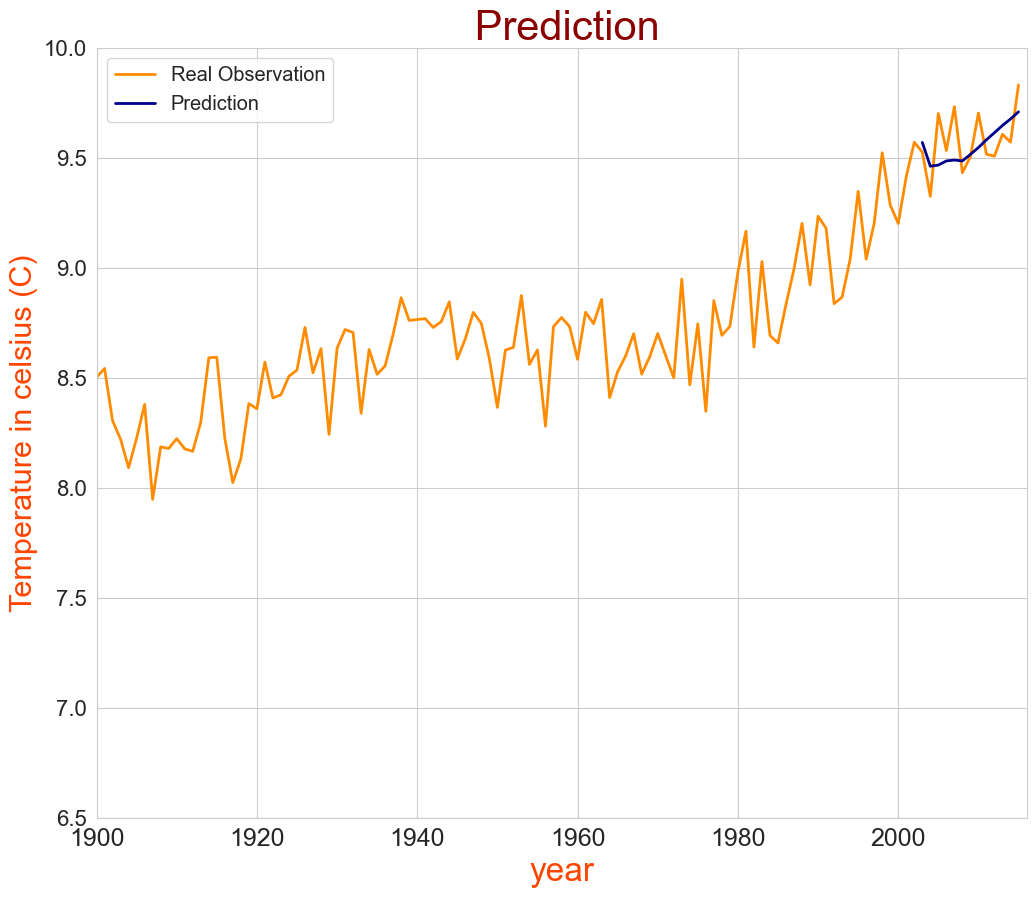

In [111]:
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(2003,2016), pred_vecm_tcr_best, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title(' Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [112]:
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13)[:,0]
print(pred_vecm_tcr_best)

[9.56966972 9.46128841 9.46654372 9.48545762 9.48943544 9.48541864
 9.51507482 9.54630477 9.58164338 9.61370185 9.64670107 9.67607642
 9.70874656]


In [113]:
pred_vecm_best = m_vecm_tc_bestfit.predict(steps=53)[:,0]

In [114]:
print(pred_vecm_best)

[8.76090196 8.75226426 8.69919679 8.78884851 8.69425923 8.68359618
 8.70430039 8.66660623 8.69929039 8.69214817 8.70282332 8.7404082
 8.74783897 8.77659536 8.80144925 8.82007152 8.84914141 8.86913756
 8.89108873 8.91528822 8.93516375 8.95785132 8.97949912 8.99993573
 9.02188885 9.04267344 9.06352948 9.08468541 9.10504536 9.12573195
 9.14627091 9.16643105 9.18672111 9.20672443 9.22661431 9.24648181
 9.26609041 9.28563401 9.30506031 9.32431679 9.3434973  9.36252336
 9.38142299 9.4002231  9.41888047 9.4374264  9.45585303 9.47415164
 9.49234128 9.51040872 9.52835752 9.54619361 9.56391063]


In [115]:
pred_vecm_best = m_vecm_tc_bestfit.predict(steps=53+10)[:,0]

In [116]:
print(pred_vecm_best)

[8.76090196 8.75226426 8.69919679 8.78884851 8.69425923 8.68359618
 8.70430039 8.66660623 8.69929039 8.69214817 8.70282332 8.7404082
 8.74783897 8.77659536 8.80144925 8.82007152 8.84914141 8.86913756
 8.89108873 8.91528822 8.93516375 8.95785132 8.97949912 8.99993573
 9.02188885 9.04267344 9.06352948 9.08468541 9.10504536 9.12573195
 9.14627091 9.16643105 9.18672111 9.20672443 9.22661431 9.24648181
 9.26609041 9.28563401 9.30506031 9.32431679 9.3434973  9.36252336
 9.38142299 9.4002231  9.41888047 9.4374264  9.45585303 9.47415164
 9.49234128 9.51040872 9.52835752 9.54619361 9.56391063 9.58151463
 9.5990049  9.61637993 9.6336438  9.65079521 9.66783518 9.6847653
 9.70158497 9.71829583 9.7348985 ]


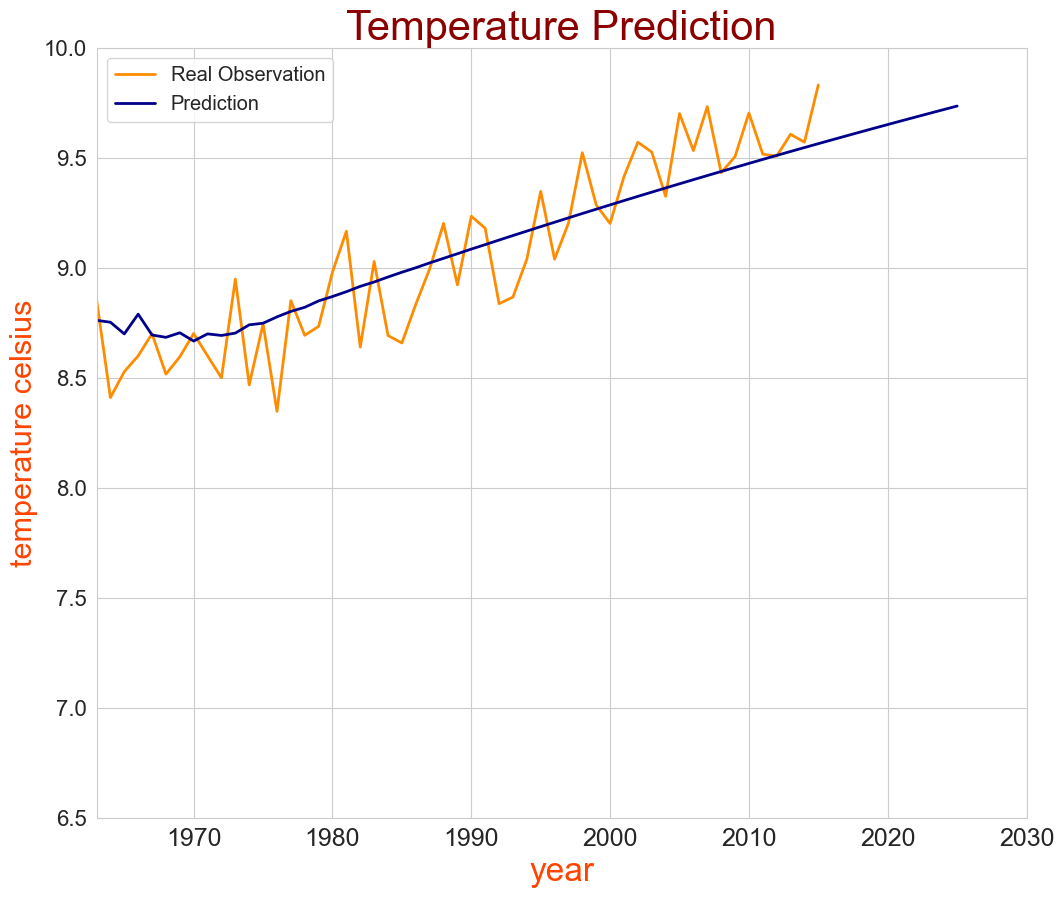

In [117]:
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(1963,2016+10), pred_vecm_best, linewidth=2, color='darkblue')
plt.xlim([1963,2030])
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('temperature celsius', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Temperature Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [118]:
round(len(df_tcr)*0.8), len(df_tcr)-round(len(df_tcr)*0.8)

(53, 13)

In [119]:
df_tcr_train = df_tcr[:53]
df_tcr_test = df_tcr[53:]

In [120]:
hyperlist7 = []
mselist7 = []
rmselist7 = []
maelist7 = []
for d in range(1,30):
    for de in ['nc','co','ci','lo','li']:
        m_vecm_tcr = VECM(endog=df_tcr_train, k_ar_diff=d, deterministic=de, coint_rank=1)
        m_vecm_tcr_fit= m_vecm_tcr.fit(method='ml')
        pred_vecm_tcr = m_vecm_tcr_fit.predict(steps=13)[:,0]
        hyperlist7.append((d, de))
        maelist7.append(mean_absolute_error(df_tcr_test['Temp'], pred_vecm_tcr))
        rmselist7.append(np.sqrt(mean_squared_error(df_tcr_test['Temp'], pred_vecm_tcr)))
        mselist7.append(mean_squared_error(df_tcr_test['Temp'], pred_vecm_tcr))


In [121]:
df_vecm_tcr = pd.DataFrame()
df_vecm_tcr['hyper'], df_vecm_tcr['mse'], df_vecm_tcr['rmse'], df_vecm_tcr['mae'] = hyperlist7, mselist7, rmselist7, maelist7
df_vecm_tcr.sort_values('rmse').head()

,hyper,mse,rmse,mae
10,"(3, nc)",0.015965,0.126353,0.105007
7,"(2, ci)",0.017762,0.133273,0.110941
15,"(4, nc)",0.019813,0.140760,0.121020
5,"(2, nc)",0.020370,0.142725,0.108741
20,"(5, nc)",0.020664,0.143748,0.125399


In [122]:
m_vecm_tcr_best = VECM(endog=df_tcr_train, k_ar_diff=3, deterministic='nc', coint_rank=1)
m_vecm_tcr_bestfit= m_vecm_tcr_best.fit(method='ml')
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13)[:,0]

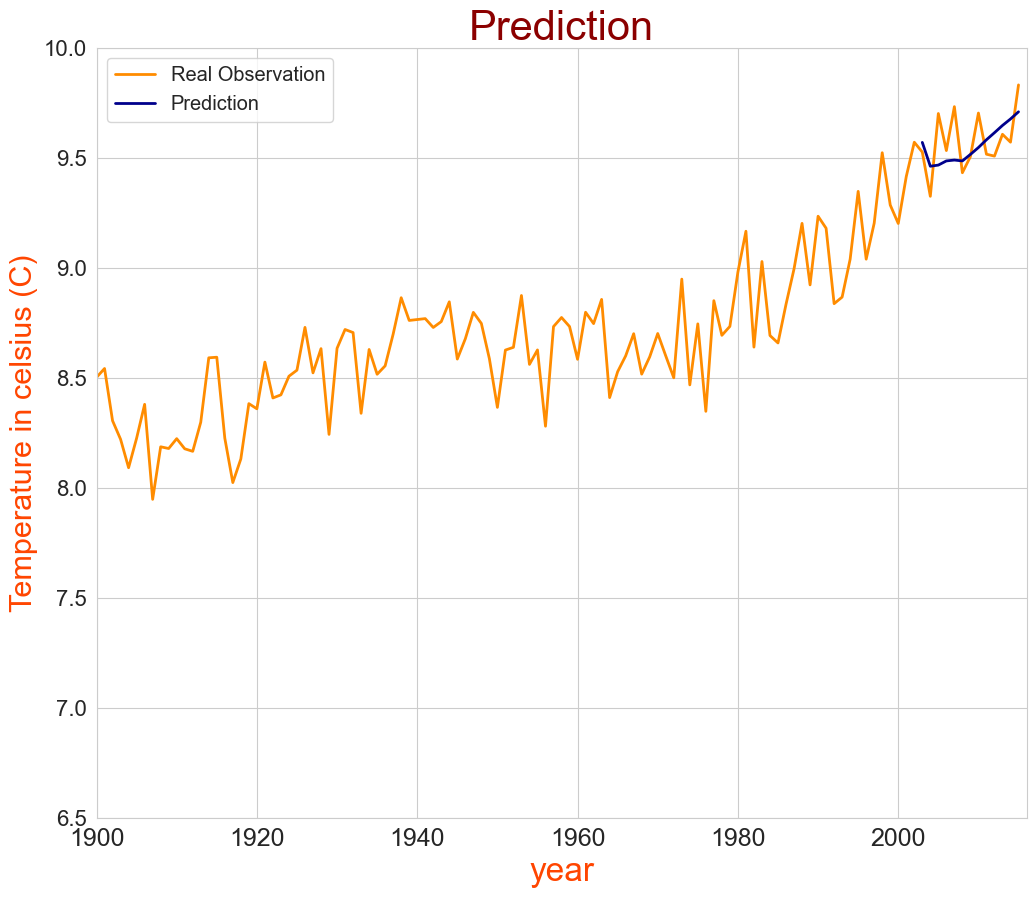

In [123]:
dfy.plot(figsize=(12,10), linewidth=2, color='darkorange')
plt.xlim([1900,2016])
plt.plot(range(2003,2016), pred_vecm_tcr_best, linewidth=2, color='darkblue')
plt.ylim([6.5,10])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')
plt.legend(('Real Observation', 'Prediction'), loc='upper left', fontsize='x-large')


In [153]:
df_tc.head()

,Temp,co2
date,,
1753,8.388083,277.263
1754,8.469333,277.304
1755,8.355583,277.351
1756,8.849583,277.389
1757,9.022000,277.442


In [154]:
df_tc.tail()

,Temp,co2
date,,
2011,9.516000,390.944015
2012,9.507333,393.015993
2013,9.606500,395.724979
2014,9.570667,397.546977
2015,9.831000,399.851668


In [156]:
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13+10)[:,0]

In [157]:
print(pred_vecm_tcr_best)

[ 9.56966972  9.46128841  9.46654372  9.48545762  9.48943544  9.48541864
  9.51507482  9.54630477  9.58164338  9.61370185  9.64670107  9.67607642
  9.70874656  9.74138589  9.77454026  9.80748868  9.84246462  9.87800303
  9.91434731  9.95112357  9.98881978 10.02705184 10.06608578]


Text(0.5, 1.0, 'Prediction')

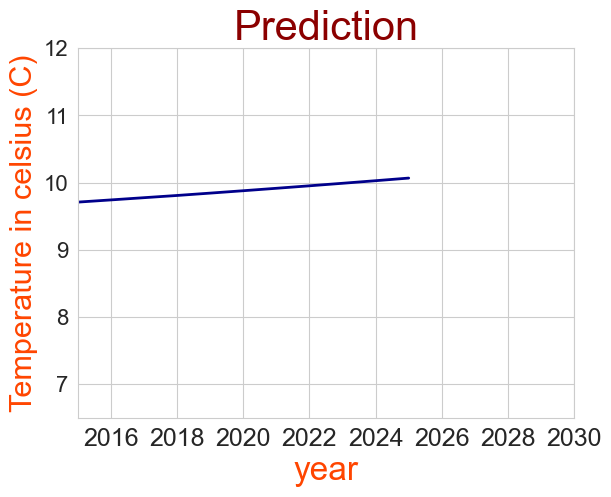

In [158]:

plt.plot(range(2003,2016+10), pred_vecm_tcr_best, linewidth=2, color='darkblue')
plt.xlim([2015,2030])
plt.ylim([6.5,12])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Prediction', fontsize=30, color='darkred')


In [159]:
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13+20)[:,0]

In [160]:
print(pred_vecm_tcr_best)

[ 9.56966972  9.46128841  9.46654372  9.48545762  9.48943544  9.48541864
  9.51507482  9.54630477  9.58164338  9.61370185  9.64670107  9.67607642
  9.70874656  9.74138589  9.77454026  9.80748868  9.84246462  9.87800303
  9.91434731  9.95112357  9.98881978 10.02705184 10.06608578 10.10578532
 10.1462756  10.18747773 10.22951204 10.27232609 10.3159634  10.36040954
 10.40571082 10.45185982 10.49888564]


Text(0.5, 1.0, 'Prediction')

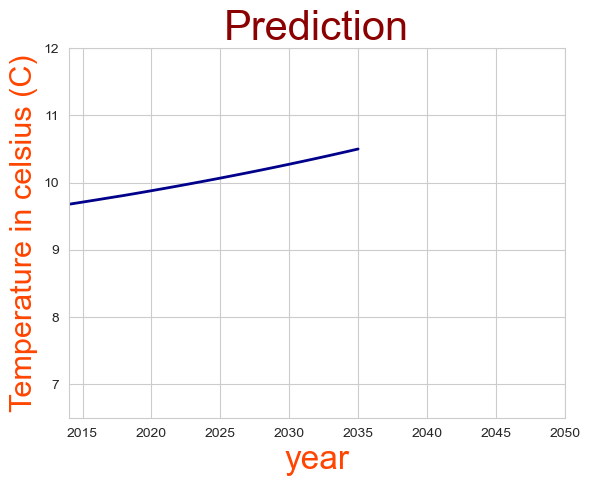

In [161]:

plt.plot(range(2003,2016+20), pred_vecm_tcr_best, linewidth=2, color='darkblue')
plt.xlim([2014,2050])
plt.ylim([6.5,12])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.title('Prediction', fontsize=30, color='darkred')



In [162]:
pred_vecm_tcr_best = m_vecm_tcr_bestfit.predict(steps=13+100)[:,0]

In [163]:
print(pred_vecm_tcr_best)

[ 9.56966972  9.46128841  9.46654372  9.48545762  9.48943544  9.48541864
  9.51507482  9.54630477  9.58164338  9.61370185  9.64670107  9.67607642
  9.70874656  9.74138589  9.77454026  9.80748868  9.84246462  9.87800303
  9.91434731  9.95112357  9.98881978 10.02705184 10.06608578 10.10578532
 10.1462756  10.18747773 10.22951204 10.27232609 10.3159634  10.36040954
 10.40571082 10.45185982 10.49888564 10.54679523 10.59561417 10.64535283
 10.69603403 10.74767194 10.80028712 10.8538959  10.90851887 10.96417388
 11.02088127 11.07866027 11.13753172 11.19751583 11.25863394 11.32090728
 11.38435785 11.44900776 11.51487979 11.58199698 11.6503829  11.7200615
 11.79105725 11.86339502 11.9371002  12.01219862 12.08871663 12.16668105
 12.24611924 12.32705905 12.40952887 12.4935576  12.57917474 12.66641029
 12.75529486 12.84585961 12.9381363  13.0321573  13.12795558 13.22556473
 13.32501899 13.42635323 13.52960299 13.63480449 13.7419946  13.85121093
 13.96249177 14.07587615 14.19140384 14.30911535 14.

Text(0.5, 1.0, 'Prediction')

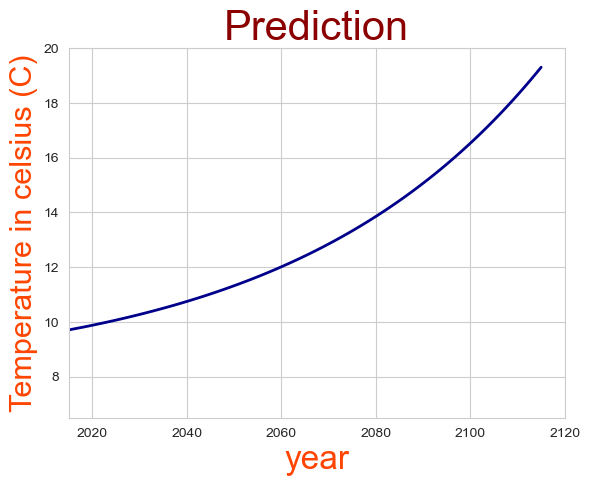

In [166]:
plt.plot(range(2003,2016+100), pred_vecm_tcr_best, linewidth=2, color='darkblue')
plt.xlim([2015,2120])
plt.ylim([6.5,20])
plt.xlabel('year',fontsize=24, color='orangered')
plt.ylabel('Temperature in celsius (C)', fontsize=22, color='orangered')
plt.title('Prediction', fontsize=30, color='darkred')
